Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


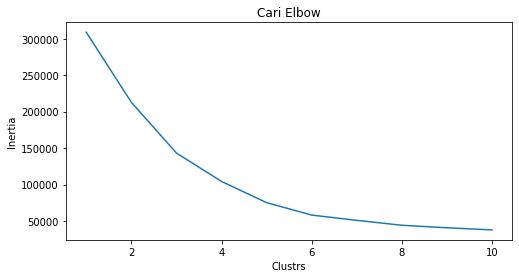

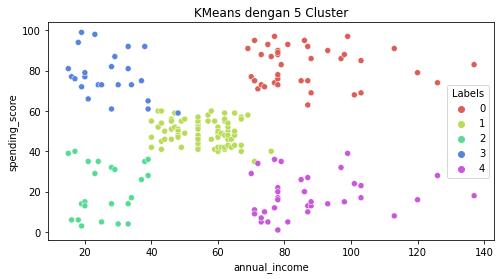

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount ('/content/drive/')

df = pd.read_csv('/content/drive/MyDrive/Dataset/Kmeans/Mall_Customers.csv') 

#ubah data nama data
df = df.rename(columns = {'Gender':'gender', 'Age':'age', 'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#mengubah data katagorik menjadi numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head(3)

from sklearn.cluster import KMeans

#menghilangkan kolom custamer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

#untuk membuat plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clustrs')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5
                                          ))
plt.title('KMeans dengan 5 Cluster')
plt.show()



